# MLP: Multilayer Perceptron

An MLP is a fully connected (FC) network

MLPs are common in simple logistic and linear regression problems. However,
MLPs are not optimal for processing sequential and multi-dimensional data
patterns. By design, an MLP struggles to remember patterns in sequential data
and requires a substantial number of parameters to process multi-dimensional data.

RNNs are popular because the internal design allows the network to discover dependency in the history of the data, which is useful for prediction

For multi-dimensional data like images and videos, CNNs excel in extracting feature maps for classification, segmentation, generation, and other downstream tasks. For multi-dimensional data like images and videos, CNNs excel in extracting feature maps for classification, segmentation, generation, and other downstream tasks

## hyperparameter

The number of units is a hyperparameter. It controls the capacity of the network. The capacity is a measure of the complexity of the function that the network can approximate. For example, for polynomials, the degree is the hyperparameter. As the degree increases, the capacity of the function also increases.

relu or ReLU is a simple non-linear function. It's very much like a filter that allows positive inputs to pass through unchanged while clamping everything else to zero.

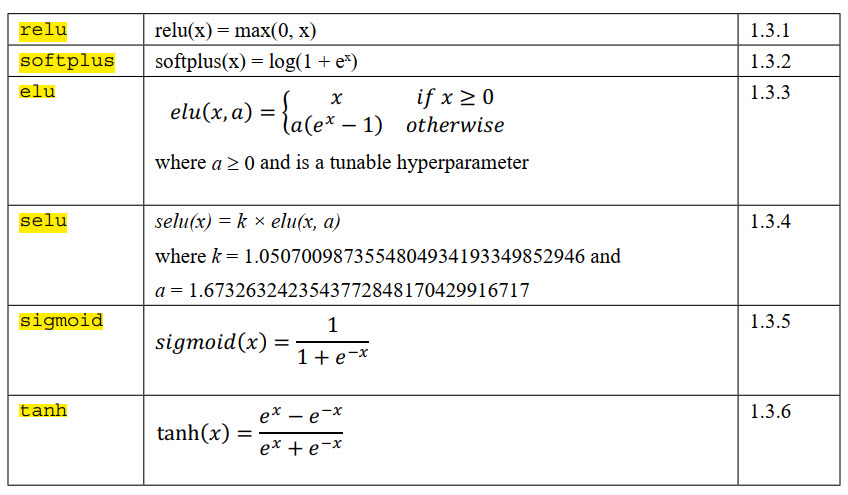

## Regularization

A neural network has the tendency to memorize its training data, especially if it contains more than enough capacity. In such cases, the network fails catastrophically when subjected to the test data. This is the classic case of the network failing to generalize. To avoid this tendency, the model uses a regularizing layer or function. A common regularizing layer is Dropout.

The Dropout layer makes neural networks robust to unforeseen input data because the network is trained to predict correctly, even if some units are missing. It's worth noting that dropout is not used in the output layer and it is only active during training. Moreover, dropout is not present during predictions.

There are regularizers that can be used other than dropouts such as l1 or l2. The bias, weight, and activation outputs can be regularized per layer

Both l1 and l2 enforce the penalty using a fraction of the sum of the absolute (l1) or square (l2) of parameter values. In other words, the penalty function forces the optimizer to find parameter values that are small. Neural networks with small parameter values are more insensitive to the presence of noise from within the input data.

For the proposed model, dropout still has a better performance than l2.

## Output activation and loss function

The idea of softmax is surprisingly simple. It squashes the outputs into probabilities by normalizing the prediction. Here, each predicted output
is a probability that the index is the correct label of the given input image. The sum of all the probabilities for all outputs is 1.0.

The numpy.argmax() method can be used to determine the index of the element with the highest value.

There are other choices of output activation layer, such as linear, sigmoid, or tanh. The linear activation is an identity function. It copies its input to its output.

The sigmoid function is more specifically known as a logistic sigmoid. This will be used if the elements of the prediction tensor will be independently mapped between 0.0 and 1.0. The summation of all the elements of the predicted tensor is not constrained to 1.0 unlike in softmax. 

The tanh function maps its input in the range -1.0 to 1.0. This is important if the output can swing in both positive and negative values. The tanh function is more popularly used in the internal layer of recurrent neural networks but has also been used as an output layer activation. If tanh is used to replace sigmoid in the output activation, the data used must be scaled appropriately

How far the predicted tensor is from the one-hot ground truth vector is called
loss. One type of loss function is mean_squared_error (MSE), or the average of
the squares of the differences between the target or label and the prediction.

categorical_crossentropy. It's the negative of the sum of the product of the target or label and the logarithm of the prediction per category. 

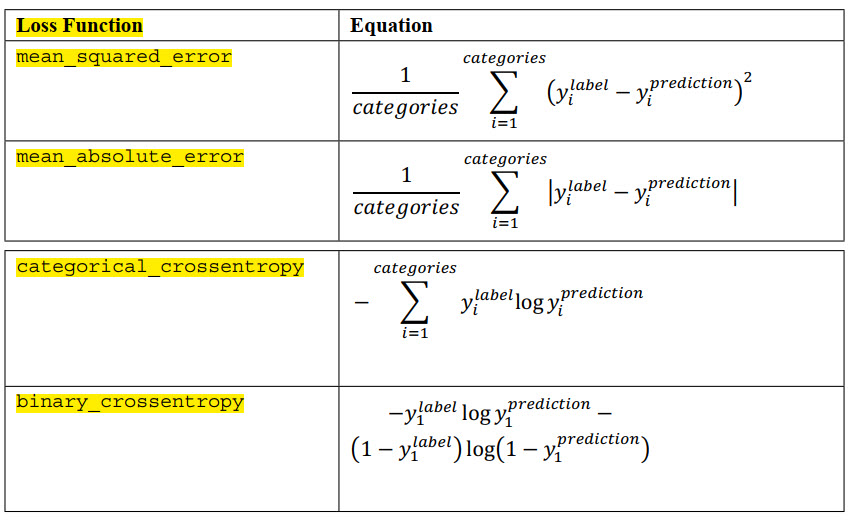

For classification by category, either categorical_crossentropy or mean_squared_error is a good choice after the softmax activation layer. The
binary_crossentropy loss function is normally used after the sigmoid activation layer, while mean_squared_error is an option for the tanh output

## Optimization

With optimization, the objective is to minimize the loss function. The idea is that if the loss is reduced to an acceptable level, the model has indirectly learned the function that maps inputs to outputs. Performance metrics are used to determine if a model has learned the underlying data distribution. The default metric in Keras is loss. During training, validation, and testing, other metrics such as accuracy

There are several choices for optimizers. The most commonly used optimizers are stochastic gradient descent (SGD), Adaptive Moments (Adam), and Root Mean Squared Propagation (RMSprop). Each optimizer features tunable parameters like learning rate, momentum, and decay. Adam and RMSprop are variations of SGD with adaptive learning rates.

The choice of learning rate is crucial. A large value of 𝜖𝜖 may not find the minimum value since the search will just swing back and forth around the minimum value.

On one hand, a large value of 𝜖𝜖 may take a significant number of iterations before the minimum is found. In the case of multiple minima, the search might get stuck in a local minimum.

In SGD, a mini batch of samples is chosen to compute an approximate value of the descent

The mini-batch size is recommended to be a power of 2 for GPU optimization purposes. In the proposed network, batch_size = 128.

The chain rule of differentiation is applied to propagate the derivatives to the lower layers and compute the gradients accordingly. This algorithm is known as backpropagation in deep learning. 

## Performance evaluation

# Convolutional Neural Network (CNN)

## Convolution

The kernel can be visualized as a rectangular patch or window that slides through the whole image from left to right, and from top to bottom. This operation is called convolution. It transforms the input image into a feature map, which is a representation of what the kernel has learned from the input image. The feature map is then transformed into another feature map in the succeeding layer and so on. 

help the network to learn shift or space invariant features and introduce such prior beliefs into the network structure. In this sense, Convolutional Neural Networks are regularized versions of neural networks and help to greatly reduce the number of parameters learned. This network structure as can be seen in the figure above has slightly over a million parameters to train.

## Batch Normalization 

Batch normalization is used in deep CNNs so that large learning rates can be
utilized without causing instability during training

is a way to shift the inputs to zero-mean and unit variance. A very high level understanding is that helps to make the data comparable across features. It is generally known to lead to a faster learning rates (although there are other interpretations to its effectiveness).

## Pooling layers 

### Max Pooling layers 

are for sample-based discretization with an objective to down-sample the input representation. You can see the feature maps starts at the input size of (256, 256, 3) and slowly gets less wider and more deeper as it goes through the network due to the max-pooling layers as well as the stride selected.

The value is equal to the maximum feature point value within the patch

The significance of MaxPooling2D is the reduction in feature map size, which
translates to an increase in receptive field size.

### Average Pooling

AveragePooling2D(2) takes the average of a patch instead of finding the maximum. 

### Strided convolution

Strided convolution, Conv2D(strides=2,…), will skip every two pixels during convolution and will still have the same 50% size reduction effect. There are subtle differences in the effectiveness of each reduction technique.

In Conv2D and MaxPooling2D, both pool_size and kernel can be non-square. In
these cases, both the row and column sizes must be indicated. For example, pool_size = (1, 2) and kernel = (3, 5).

The output of the last MaxPooling2D operation is a stack of feature maps. The role of Flatten is to convert the stack of feature maps into a vector format that is suitable for either Dropout or Dense layers, similar to the MLP model output layer.

# Recurrent Neural Network (RNN)

RNNs are a family of networks that are suitable for learning representations of sequential data

### Long Short-Term Memory (LSTM)

LSTM addresses the problem of long-term dependency or remembering relevant past information to the present output.

The information flow between cell states is controlled by three gates, ft, it, and qt. The three gates have the effect of determining which information should be retained or replaced and the amount of information in the past and current input that should contribute to the current cell state or output.

### Gated Recurrent Unit (GRU)

If LSTM is overkill for the task at hand, a simpler version called a Gated Recurrent Unit (GRU) can be used. A GRU simplifies LSTM by combining the cell state and hidden state together. A GRU also reduces the number of gates by one. 

One way is making an RNN model that is bidirectional. By default, RNNs are unidirectional in the sense that the current output is only influenced by the past states and the current input.

In bidirectional RNNs, future states can also influence the present and past states by allowing information to flow backward. Past outputs are updated as needed depending on the new information received. RNNs can be made bidirectional by calling a wrapper function. 

For all types of RNNs, increasing the number of units will also increase the capacity.

However, another way of increasing the capacity is by stacking the RNN layers. It should be noted though that as a general rule of thumb, the capacity of the model should only be increased if needed. Excess capacity may contribute to overfitting, and, as a result, may lead to both a longer training time and a slower performance during prediction.